In [1]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

# Ucitavanje baze podataka. U x smesteni prediktori, u y varijabla koju treba predvideti
df = pd.read_csv('weatherHistory.csv')
print(df.shape)
df.head()

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
print(df['Summary'].unique())

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']


In [3]:
print(df['Daily Summary'].unique())

['Partly cloudy throughout the day.' 'Mostly cloudy throughout the day.'
 'Foggy in the evening.' 'Foggy overnight and breezy in the morning.'
 'Overcast throughout the day.' 'Partly cloudy until night.'
 'Mostly cloudy until night.'
 'Foggy starting overnight continuing until morning.'
 'Foggy in the morning.' 'Partly cloudy until evening.'
 'Partly cloudy starting in the morning.'
 'Mostly cloudy starting overnight continuing until night.'
 'Mostly cloudy until evening.'
 'Partly cloudy starting in the morning continuing until evening.'
 'Partly cloudy starting in the afternoon.'
 'Partly cloudy starting overnight.' 'Partly cloudy until morning.'
 'Partly cloudy starting overnight continuing until night.'
 'Partly cloudy starting in the afternoon continuing until night.'
 'Mostly cloudy starting overnight.' 'Partly cloudy until afternoon.'
 'Mostly cloudy until night and breezy in the afternoon.'
 'Foggy starting in the evening.' 'Foggy throughout the day.'
 'Foggy starting in the ev

In [5]:
x=df.drop(['Summary','Daily Summary', 'Formatted Date', 'Loud Cover', 'Visibility (km)'], axis=1)
y=df['Visibility (km)']
print(x.shape)
print(x.columns)
x.head()

(96453, 7)
Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Pressure (millibars)'],
      dtype='object')


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,1016.51


In [4]:
print(df['Precip Type'].unique())

['rain' 'snow' nan]


In [6]:
# Prebacivanje kateg. vrednosti u numer. i dopuna je nan znaci da nema padavina
x['Precip Type'].fillna(0,inplace=True)
x.loc[x['Precip Type']=='rain','Precip Type']=1
x.loc[x['Precip Type']=='snow','Precip Type']=2
print(x['Precip Type'].unique())
x.head()

[1 2 0]


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,251.0,1015.13
1,1,9.355556,7.227778,0.86,14.2646,259.0,1015.63
2,1,9.377778,9.377778,0.89,3.9284,204.0,1015.94
3,1,8.288889,5.944444,0.83,14.1036,269.0,1016.41
4,1,8.755556,6.977778,0.83,11.0446,259.0,1016.51


In [7]:
#provera nedostajucih vrednosti
print(x.isnull().sum().sum())


0


In [8]:
#statisticka analiza
x.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,1.105699,11.932678,10.855029,0.734899,10.810640,187.509232,1003.235956
std,0.324420,9.551546,10.696847,0.195473,6.913571,107.383428,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.688889,2.311111,0.600000,5.828200,116.000000,1011.900000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,180.000000,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,290.000000,1021.090000
max,2.000000,39.905556,39.344444,1.000000,63.852600,359.000000,1046.380000


count    96453.000000
mean        10.347325
std          4.192123
min          0.000000
25%          8.339800
50%         10.046400
75%         14.812000
max         16.100000
Name: Visibility (km), dtype: float64


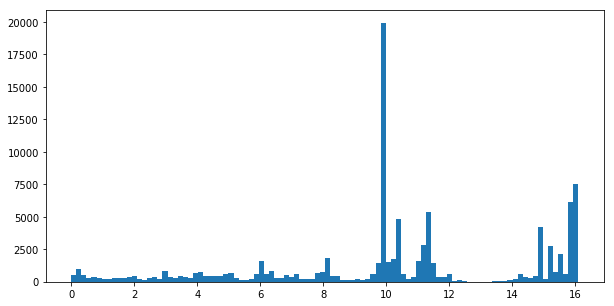

In [9]:
#analiza i prikaz rapodele varijable koja se predvi]a i korekcija po preporuci iz baze
print(y.describe())
plt.figure(figsize=(10,5))
plt.hist(y,100);

In [10]:
def model_evaluation(y, y_predicted, N, d):
    # model evaluation
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    #print('Slope:', list(zip(x.columns, model.coef_)))
    #print('Intercept:', model.intercept_)
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [30]:
# podela skupa na trening i test podatke
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)


Mean squared error:  14.5137298483844
Mean absolute error:  3.1053225964715083
Root mean squared error:  3.8096889437832586
R2 score:  0.19405403989500924
R2 adjusted score:  0.1939924649269804
          y     y_pred
0   15.5526  12.984852
1    9.9820  10.051886
2    9.6278  11.072109
3    8.0500   9.074328
4    7.5509   7.239663
5   13.7977   8.697868
6    9.9820  12.878964
7   11.2700  11.204731
8    4.5080  11.900489
9    8.4203   9.617423
10   8.0983   8.848000
11  10.3523  11.264012
12   3.4937   6.050733
13   9.9820  10.647616
14  16.1000  12.549619
15   0.0000  12.457561
16   8.0500   7.106212
17   9.9820  11.373306
18   0.5313   8.689734
19  11.2700   9.830478
koeficijenti:  [-1.87273197e+00  1.41869887e-01 -5.69843270e-02 -4.57926422e+00
  1.87693475e-02  1.33996063e-03  2.38245167e-03]


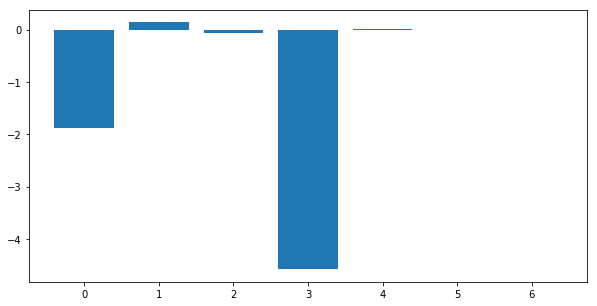

In [38]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Model initialization
first_regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
first_regression_model.fit(x_train, y_train)

# Predict
y_predicted = first_regression_model.predict(x_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("koeficijenti: ", first_regression_model.coef_)

In [14]:
# Selekcija obelezja

import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()

D:\Program Files\Python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Visibility (km)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3305.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        12:38:02   Log-Likelihood:            -2.5097e+05
No. Observations:               91630   AIC:                         5.020e+05
Df Residuals:                   91622   BIC:                         5.020e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.8639      0.162     73.213      0.000      11.546      12.182
Precip Type                 -1.8727      0.047    -39.978      0.000      -1.965      -1.781
Temperature (C)              0.1419      0.013     10.891      0.000       0.116       0.167
Apparent Temperature (C)    -0.0570      0.012     -4.940      0.000      -0.080      -0.034
Humidity                    -4.5793      0.088    -52.145      0.000      -4.751      -4.407
Wind Speed (km/h)            0.0188      0.002      8.511      0.000       0.014       0.023
Wind Bearing (degrees)       0.0013      0.000     11.526      0.000       0.001       0.002
Pressure (millibars)         0.0024      0.000     22.620      0.000       0.002       0.003
==============================================================================
Omnibus:                     1991.566   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.940
Skew:                           0.019   Prob(JB):                    2.77e-228
Kurtosis:                       2.477   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Primer 3: Ponavljanje Primera 2, uz standardizaciju obelezja

# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,-0.325961,-0.727964,-0.954592,0.435117,1.854398,1.131446,0.124422
1,-0.325961,0.554857,0.596262,0.844492,-0.657509,-0.611553,0.081393
2,2.758281,-1.350168,-1.618279,0.588632,1.346895,-1.664809,0.159967
3,2.758281,-1.254713,-1.442092,1.305039,0.692729,-1.282654,0.111836
4,-0.325961,-0.722144,-0.812188,0.844492,0.292314,-1.655489,0.091768


Mean squared error:  14.513729848384408
Mean absolute error:  3.105322596471511
Root mean squared error:  3.8096889437832595
R2 score:  0.1940540398950089
R2 adjusted score:  0.19399246492698008
          y     y_pred
0   15.5526  12.984852
1    9.9820  10.051886
2    9.6278  11.072109
3    8.0500   9.074328
4    7.5509   7.239663
5   13.7977   8.697868
6    9.9820  12.878964
7   11.2700  11.204731
8    4.5080  11.900489
9    8.4203   9.617423
10   8.0983   8.848000
11  10.3523  11.264012
12   3.4937   6.050733
13   9.9820  10.647616
14  16.1000  12.549619
15   0.0000  12.457561
16   8.0500   7.106212
17   9.9820  11.373306
18   0.5313   8.689734
19  11.2700   9.830478
koeficijenti:  [-0.60719353  1.35413872 -0.60913116 -0.89487919  0.12980545  0.14375946
  0.28016858]


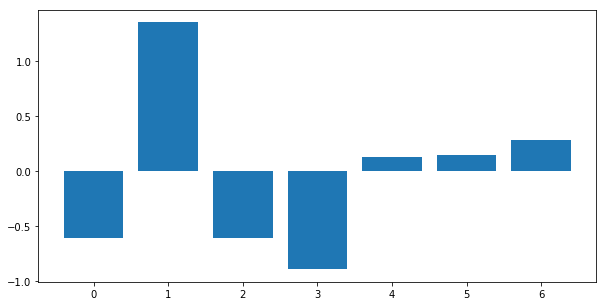

In [40]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Model initialization
regression_model_std = LinearRegression()

# Fit the data(train the model)
regression_model_std.fit(x_train_std, y_train)

# Predict
y_predicted = regression_model_std.predict(x_test_std)

# Evaluation
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
print("koeficijenti: ", regression_model_std.coef_)

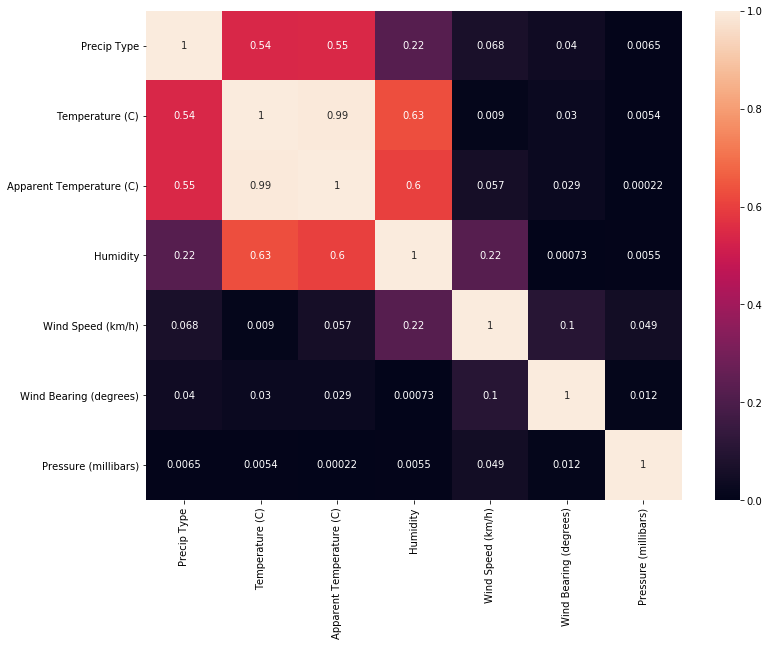

In [17]:
corr = x.corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr.abs(), annot=True);

Mean squared error:  11.824832340895771
Mean absolute error:  2.834887734568537
Root mean squared error:  3.438725394807758
R2 score:  0.34336824829872103
R2 adjusted score:  0.34316753336059114
          y     y_pred
0   15.5526  11.855018
1    9.9820  10.572913
2    9.6278  11.936398
3    8.0500   7.972425
4    7.5509   8.486140
5   13.7977   6.438387
6    9.9820  12.213650
7   11.2700  11.939318
8    4.5080   9.406728
9    8.4203   9.537899
10   8.0983   7.270605
11  10.3523  12.266796
12   3.4937   2.102341
13   9.9820  11.299058
14  16.1000  12.272711
15   0.0000   9.874948
16   8.0500   6.810351
17   9.9820  12.867702
18   0.5313   6.387478
19  11.2700  11.460077
koeficijenti:  [ 0.40735565  5.50531007 -4.1898296  -1.55574927 -0.12597445  0.16832179
  0.27885033 -0.12629395  0.30870481 -0.09645805 -0.04954322  0.01777833
 -0.03793884 -0.0573912   0.17827956 -0.14835113 -0.31177394  0.3280579
  1.55787568  0.17744657  0.19927549 -0.4423478   0.28641197  0.05259425
 -0.09125869 -0.

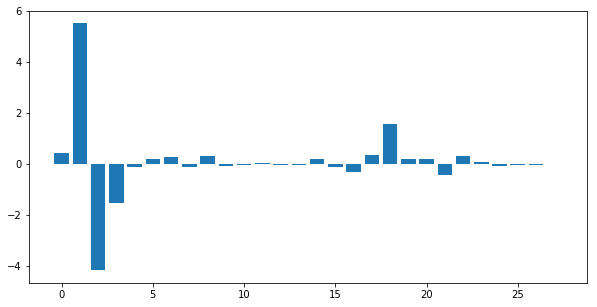

In [32]:
# Primer 4: Lin. regresija sa drugacijom hipotezom

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Model initialization
regression_model_inter = LinearRegression()

# Fit the data(train the model)
regression_model_inter.fit(x_inter_train, y_train)

# Predict
y_predicted = regression_model_inter.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  11.186442134207057
Mean absolute error:  2.789784333104678
Root mean squared error:  3.3446138991230447
R2 score:  0.3788179923291043
R2 adjusted score:  0.37858062557725947
          y     y_pred
0   15.5526  12.091696
1    9.9820  10.850763
2    9.6278  12.601090
3    8.0500   8.893215
4    7.5509   8.055319
5   13.7977   6.423193
6    9.9820  12.788932
7   11.2700  12.499840
8    4.5080   7.359626
9    8.4203  10.404644
10   8.0983   8.219397
11  10.3523  12.831015
12   3.4937   1.340198
13   9.9820  11.458670
14  16.1000  12.285496
15   0.0000   8.530265
16   8.0500   7.131002
17   9.9820  12.956538
18   0.5313   6.333566
19  11.2700   9.946170
koeficijenti:  [ 1.51317249e+01 -1.31345802e-01  4.69291749e-01  4.46670336e+01
  3.03270593e-01 -3.22179989e-03  4.17600238e-02 -2.66606506e+00
  2.16518604e-01 -3.76392535e-01 -6.37903625e+00 -1.71651641e-01
  1.01272646e-03 -1.20775609e-03  2.76578464e-01 -4.97537226e-01
 -1.28596908e-01 -3.43441702e-02 -2.90795592e-0

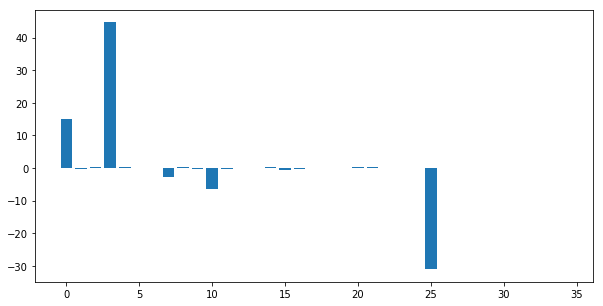

In [33]:
# Primer 4: Lin. regresija sa drugacijom hipotezom

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train)
x_inter_test = poly.transform(x_test)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Model initialization
regression_model_degree = LinearRegression()

# Fit the data(train the model)
regression_model_degree.fit(x_inter_train, y_train)

# Predict
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  11.251345309278873
Mean absolute error:  2.792090281659172
Root mean squared error:  3.3543025071210963
R2 score:  0.37521392553899935
R2 adjusted score:  0.37497518159718946
          y     y_pred
0   15.5526  12.035928
1    9.9820  10.722417
2    9.6278  12.373031
3    8.0500   8.840719
4    7.5509   7.841670
5   13.7977   6.395791
6    9.9820  12.635104
7   11.2700  12.276510
8    4.5080   7.602716
9    8.4203  10.215365
10   8.0983   8.217519
11  10.3523  12.599247
12   3.4937   1.765880
13   9.9820  11.314251
14  16.1000  12.219769
15   0.0000   8.710756
16   8.0500   7.597171
17   9.9820  12.972463
18   0.5313   6.317236
19  11.2700  10.478836
koeficijenti:  [ 5.90444451e+00 -7.54746349e-01  5.20511298e-01  1.09433894e+01
  9.00213346e-02 -4.47848573e-03  2.81353309e-02 -2.18306469e+00
  2.48336479e-01 -3.15529648e-01 -6.27759002e-01 -1.19804252e-01
  1.25549480e-03  1.20323296e-03  2.55057285e-01 -4.54862201e-01
  1.57691698e-01 -2.90894790e-02 -2.67134779e-

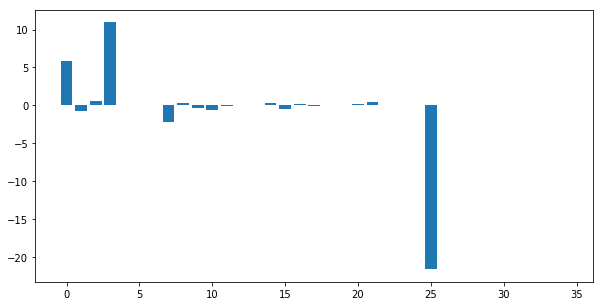

In [34]:
# Primer 5: Ridge regresija

# Model initialization
ridge_model = Ridge(alpha=15)

# Fit the data(train the model)
ridge_model.fit(x_inter_train, y_train)

# Predict
y_predicted = ridge_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  11.44521134262581
Mean absolute error:  2.80805007974103
Root mean squared error:  3.3830772002166625
R2 score:  0.3644485641873867
R2 adjusted score:  0.3642057065738591
          y     y_pred
0   15.5526  12.176605
1    9.9820  10.666764
2    9.6278  12.156966
3    8.0500   8.676891
4    7.5509   8.035871
5   13.7977   6.627931
6    9.9820  12.629605
7   11.2700  12.060932
8    4.5080   9.251866
9    8.4203   9.828950
10   8.0983   8.326915
11  10.3523  12.403613
12   3.4937   1.897937
13   9.9820  11.138876
14  16.1000  12.429965
15   0.0000   9.874912
16   8.0500   7.178669
17   9.9820  12.903583
18   0.5313   6.350062
19  11.2700  10.928424
koeficijenti:  [ 0.00000000e+00 -2.14634477e-01 -1.83055260e-01  0.00000000e+00
 -0.00000000e+00 -4.22606321e-03  2.93970591e-02 -7.26351871e-01
  6.12465887e-02 -6.29249056e-02 -0.00000000e+00  0.00000000e+00
  1.18695361e-03  1.98417703e-03  1.29597614e-02 -1.98452318e-03
  5.86060232e-01 -9.26422866e-04 -7.92507687e-05  

D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519325.7833248237, tolerance: 160.817718002779
  positive)


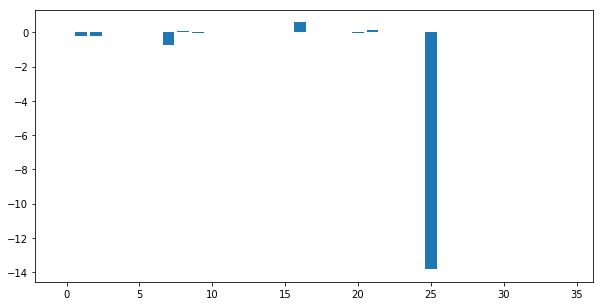

In [35]:
# Primer 6: Lasso regresija

# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

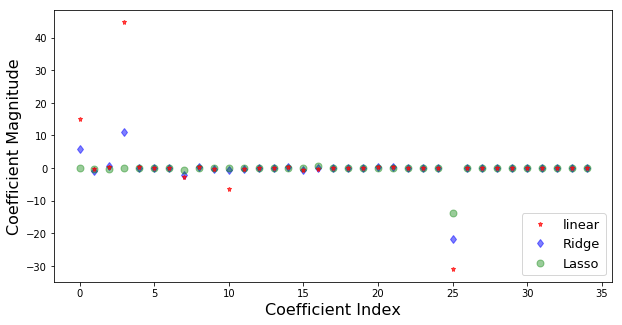

In [36]:
plt.figure(figsize=(10,5))
plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)